# Bitcoin Price Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [2]:
df = pd.read_csv("/content/bitcoin.csv")

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [3]:
df.shape

(2713, 7)

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,2713.0,1.131104e+04,1.610643e+04,1.768970e+02,6.063970e+02,6.301570e+03,1.045240e+04,6.754973e+04
High,2713.0,1.161429e+04,1.653739e+04,2.117310e+02,6.092610e+02,6.434618e+03,1.076264e+04,6.878962e+04
Low,2713.0,1.097556e+04,1.560857e+04,1.715100e+02,6.041100e+02,6.214220e+03,1.020239e+04,6.638206e+04
Close,2713.0,1.132391e+04,1.611037e+04,1.781030e+02,6.067190e+02,6.317610e+03,1.046226e+04,6.756683e+04
Adj Close,2713.0,1.132391e+04,1.611037e+04,1.781030e+02,6.067190e+02,6.317610e+03,1.046226e+04,6.756683e+04
Volume,2713.0,1.470462e+10,2.001627e+10,5.914570e+06,7.991080e+07,5.098183e+09,2.456992e+10,3.509679e+11


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2713 entries, 0 to 2712
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2713 non-null   object 
 1   Open       2713 non-null   float64
 2   High       2713 non-null   float64
 3   Low        2713 non-null   float64
 4   Close      2713 non-null   float64
 5   Adj Close  2713 non-null   float64
 6   Volume     2713 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 148.5+ KB


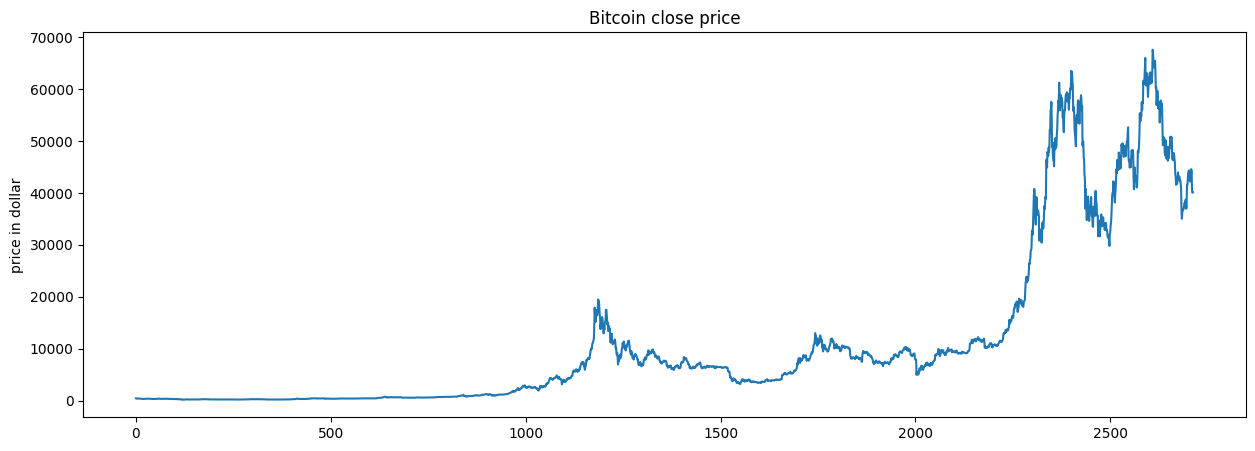

In [6]:
plt.figure(figsize=(15,5))

plt.plot(df["Close"])

plt.title("Bitcoin close price")

plt.ylabel("price in dollar")

plt.show()

In [7]:
df[df["Close"]==df["Adj Close"]].shape, df.shape

((2713, 7), (2713, 7))

In [8]:
df = df.drop(["Adj Close"], axis=1)

In [9]:
df.isnull().sum().any()

np.False_

In [10]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

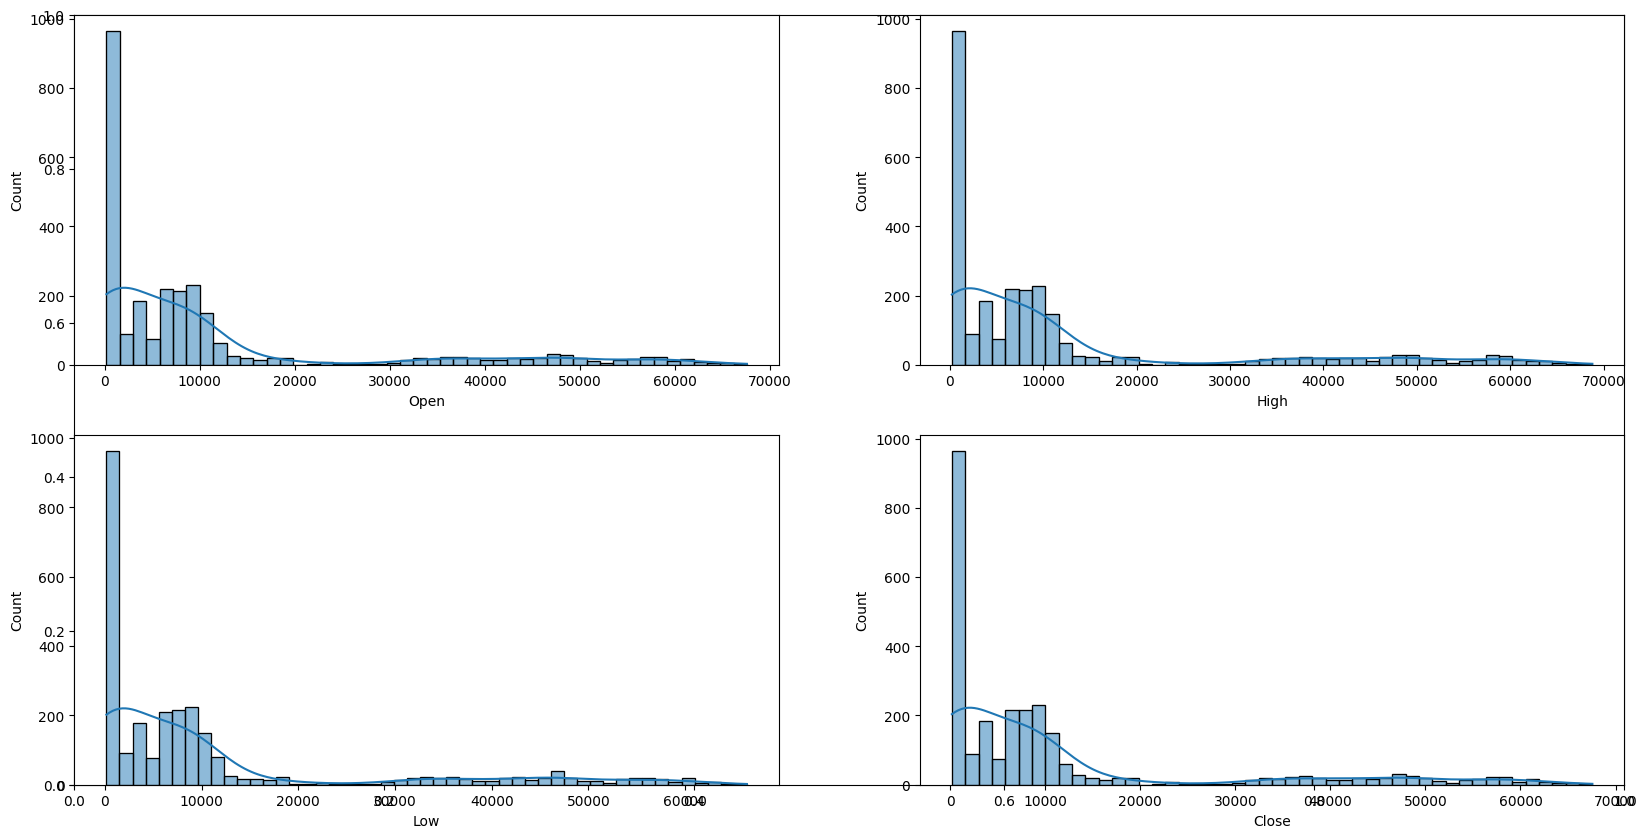

In [11]:
features= ['Open', 'High', 'Low', 'Close']

plt.subplots(figsize=(20,10))

for i, col in enumerate(features):
  plt.subplot(2,2,i+1)
  sns.histplot(df[col], kde=True)

plt.show()

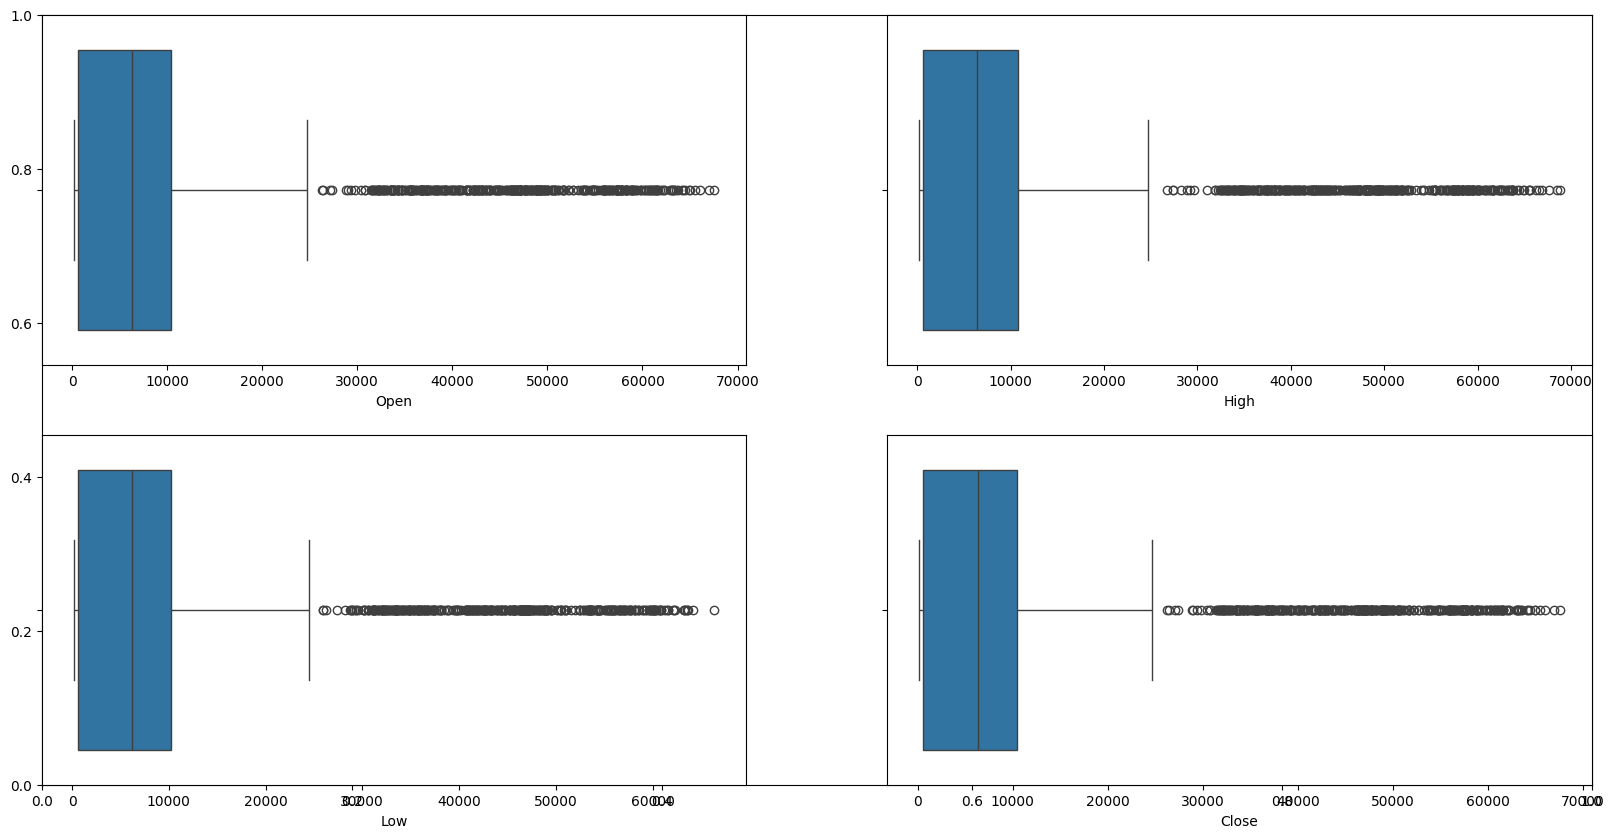

In [12]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,2,i+1)
  sns.boxplot(df[col], orient="h")
plt.show()

In [13]:
splitted =df["Date"].str.split("-", expand=True)

df["year"] = splitted[0].astype("int")
df["month"] = splitted[1].astype("int")
df["day"] = splitted[2].astype("int")

df["Date"] = pd.to_datetime(df["Date"], infer_datetime_format=True, errors="coerce")

/tmp/ipython-input-13-2164596183.py:7: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df["Date"] = pd.to_datetime(df["Date"], infer_datetime_format=True, errors="coerce")


In [14]:
df.head()

,Date,Open,High,Low,Close,Volume,year,month,day
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,2014,9,17
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,2014,9,18
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,2014,9,19
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,2014,9,20
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,2014,9,21


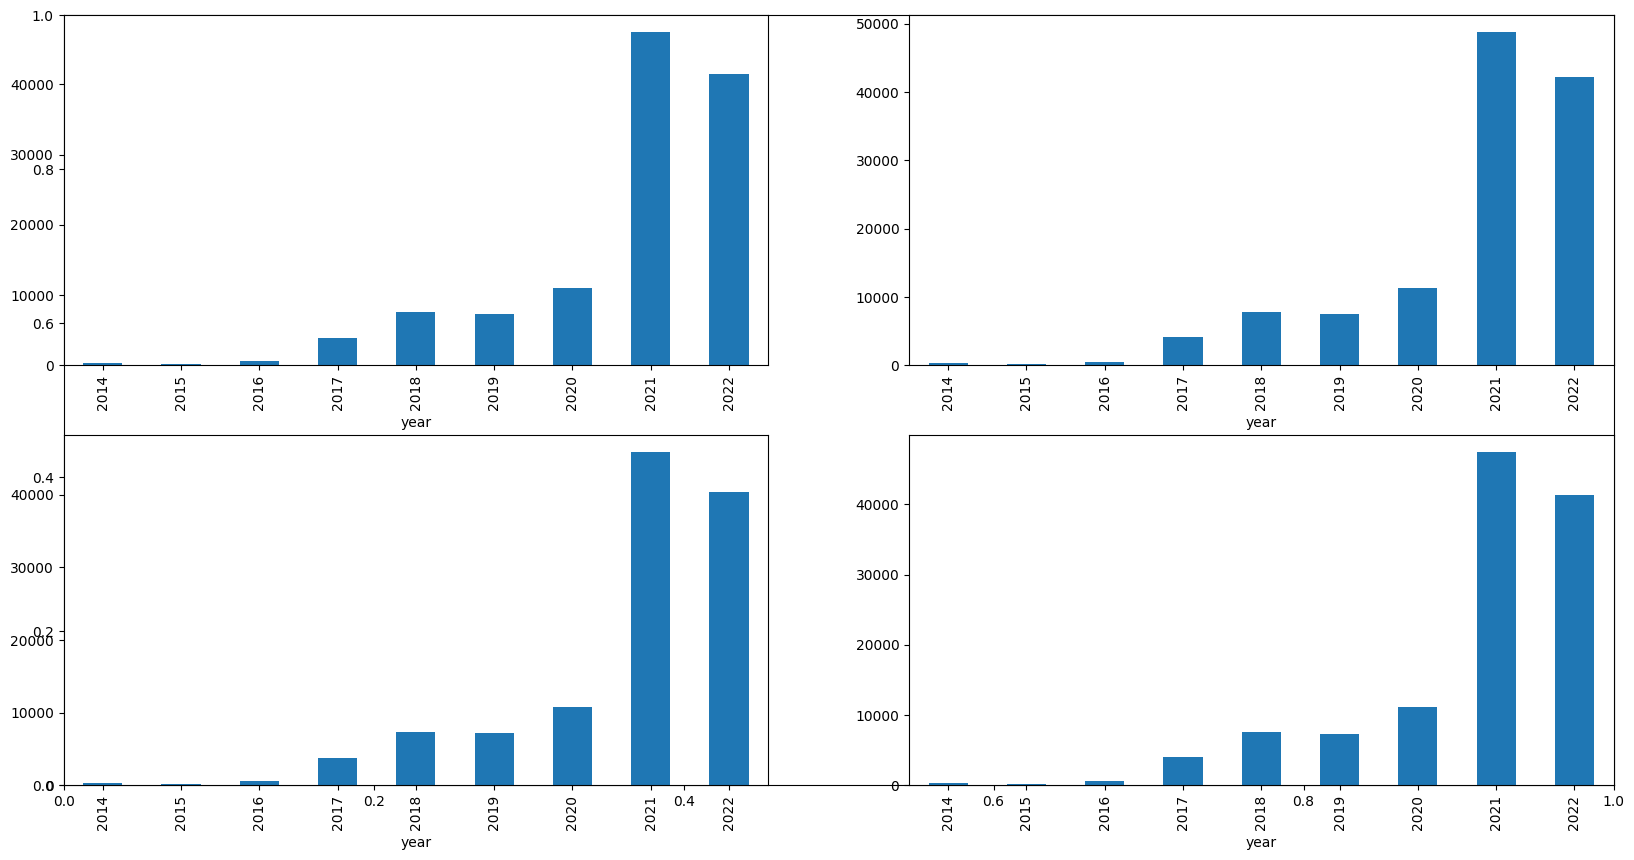

In [15]:
data_groupped = df.groupby("year").mean()

plt.subplots(figsize=(20,10))
for i, col in enumerate(["Open", "High", "Low", "Close"]):
  plt.subplot(2,2,i+1)
  data_groupped[col].plot.bar()

plt.show()

In [16]:
df["is_quarter_end"] = np.where(df["month"]%3==0, 1, 0)

df.head()


,Date,Open,High,Low,Close,Volume,year,month,day,is_quarter_end
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,2014,9,17,1
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,2014,9,18,1
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,2014,9,19,1
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,2014,9,20,1
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,2014,9,21,1


In [17]:
df["open-close"] = df["Open"] - df["Close"]
df["low-high"] = df["Low"] - df["High"]
df["target"] = np.where(df["Close"].shift(-1) > df["Close"], 1, 0)

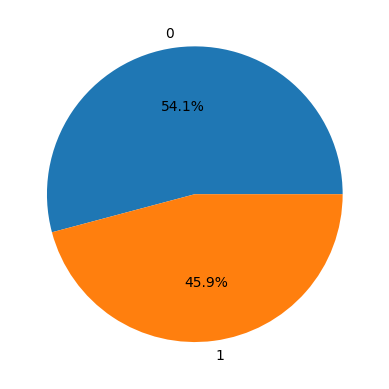

In [19]:
plt.pie(df["target"].value_counts().values, labels=[0,1], autopct="%1.1f%%")
plt.show()

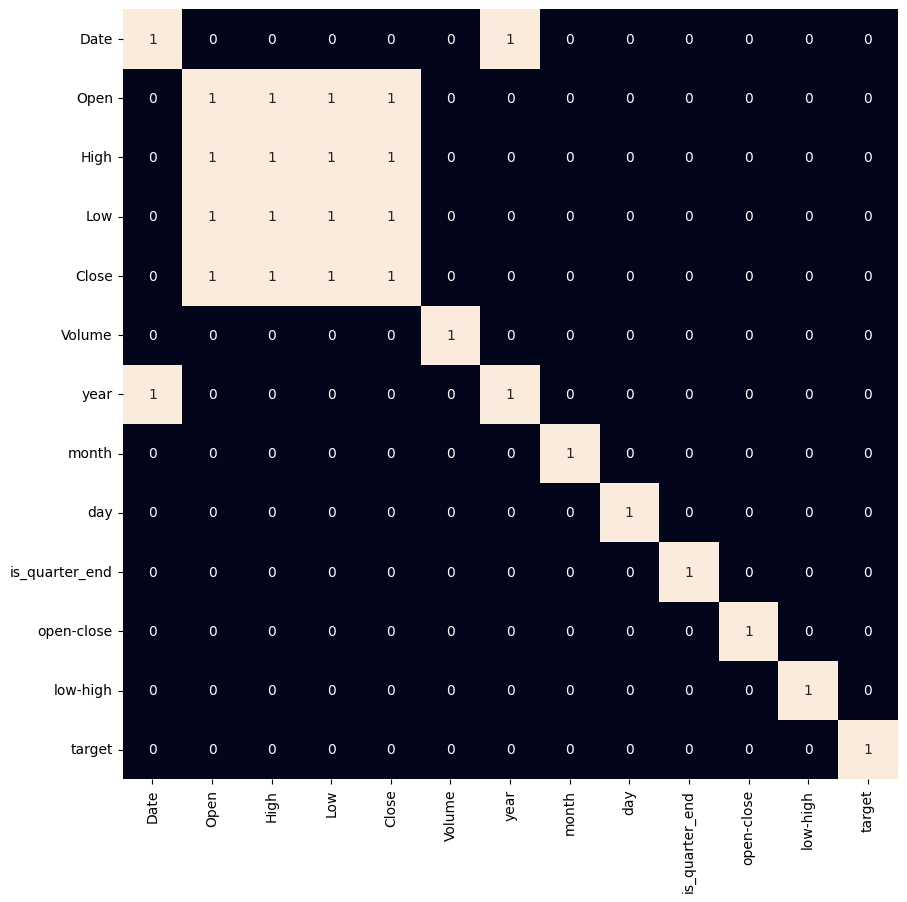

In [20]:
plt.figure(figsize=(10,10))

sns.heatmap(df.corr() > 0.9, annot=True, cbar=False)

plt.show()

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

features = df[["open-close", "low-high", "is_quarter_end"]]
target = df["target"]


features = scaler.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=13)

In [26]:
from sklearn import metrics

models = [LogisticRegression(), SVC(kernel="poly", probability=True), XGBClassifier()]

for i in range(3):
  models[i].fit(X_train, y_train)

  train_pred = models[i].predict_proba(X_train)[:, 1]
  test_pred = models[i].predict_proba(X_test)[:, 1]

  train_score = metrics.roc_auc_score(y_train, train_pred)
  test_score = metrics.roc_auc_score(y_test, test_pred)

  print(f"{models[i]}: ")
  print(f"Training score: {train_score}")
  print(f"Test score: {test_score}")

LogisticRegression(): 
Training score: 0.5266859431557754
Test score: 0.5070558486051444
SVC(kernel='poly', probability=True): 
Training score: 0.4730973034333569
Test score: 0.4931480776551199
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...): 
Training score: 0.9221285527640343
Test score:

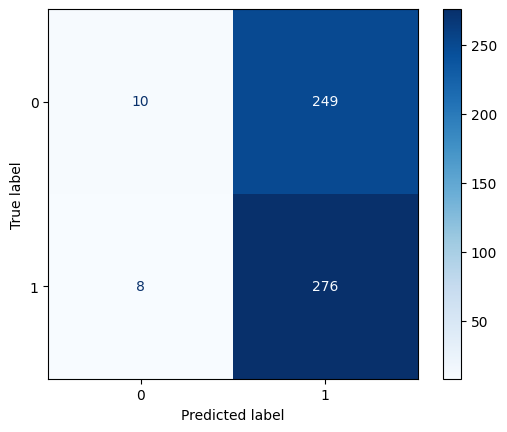

In [28]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(models[0], X_test, y_test, cmap="Blues")

plt.show()